In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

from agents import SatisfiaAgent
from games import JOBST_GAME
from monte_carlo import combined_strategies
from network.closeness_centrality import NetworkByCentrality

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
N_AGENTS = 50
EDGES_PER_NODE = 2
BASE_BARABASI = nx.barabasi_albert_graph(N_AGENTS, EDGES_PER_NODE)

In [4]:
my_graph = NetworkByCentrality(
                                JOBST_GAME,
                                combined_strategies,
                                0.4,
                                100,
                                BASE_BARABASI,
                                50,
                                0
)

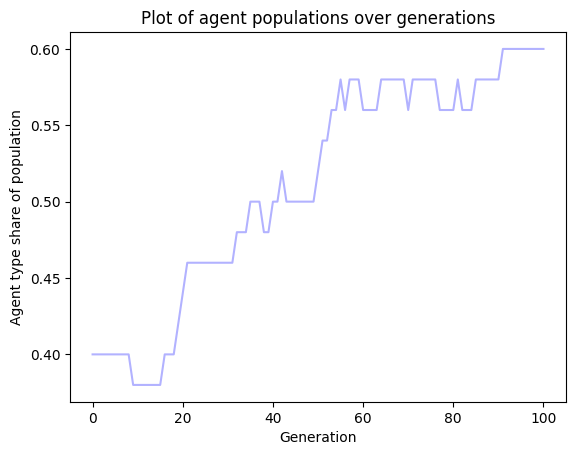

In [5]:
fig,ax=plt.subplots()
my_graph.iterate_generations(1, 1, plot=True, fig=fig,ax=ax,agent_to_plot=SatisfiaAgent)
plt.show()

In [6]:
# Constant parameters for experimenting over centrality shifts
N_AGENTS = 30
EDGES_PER_NODE = 2
BASE_BARABASI = nx.barabasi_albert_graph(N_AGENTS, EDGES_PER_NODE)
SATISFIA_SHARE=0.4
# Defining range of shifts
centrality_shifts = np.arange(stop=round(N_AGENTS*(1-SATISFIA_SHARE)), step=1)

In [7]:
def experiment_over_shifts(range_of_shifts: list[int], **kwargs):

    for shift in range_of_shifts:

        my_graph = NetworkByCentrality(
                                JOBST_GAME,
                                combined_strategies,
                                0.4,
                                200,
                                BASE_BARABASI,
                                100,
                                shift)
        
        my_graph.iterate_generations(1, 0.5,**kwargs)
        


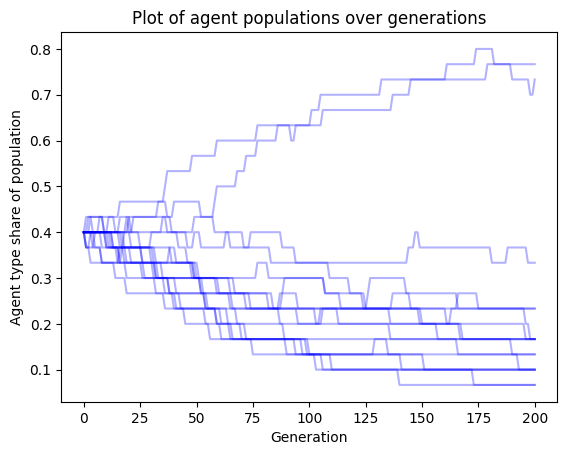

In [8]:
fig, ax = plt.subplots()
experiment_over_shifts(centrality_shifts, plot=True, fig=fig, ax=ax, agent_to_plot=SatisfiaAgent)
plt.show()